I am goint to work with dataset about Bicycle Accidents in Great Britain from 1979 to 2018

https://data.world/gonzandrobles/bicycleaccidentsuk

I want to understand situation with road safty for cyclists, want to identify risk groups and conditions when most of accidents happen.

I am going to explore data, modify it if needed and further use this information in Tableau, because this is tool I want to try and learn more about its functions.

In [1]:
import pandas as pd

I want to merge two dataset on Accident Index, because one dataset contains information about accident itself, the second one contains information about biker invollved in accident.

In [2]:
df_a = pd.read_csv('/Users/kristina/Documents/Velo_python/Accidents.csv')
df_b = pd.read_csv('/Users/kristina/Documents/Velo_python/Bikers.csv')

In [3]:
df_t = df_a.merge(df_b, on='Accident_Index')

In [4]:
df_t.columns

Index(['Accident_Index', 'Number_of_Vehicles', 'Number_of_Casualties', 'Date',
       'Time', 'Speed_limit', 'Road_conditions', 'Weather_conditions', 'Day',
       'Road_type', 'Light_conditions', 'Gender', 'Severity', 'Age_Grp'],
      dtype='object')

**Some numbers look wierd. Like max speed limit 660 mph, looks like typo. Same for 60 numbers of casualties and 13 vehicles invollved in an one accident.

In [5]:
df_t.describe()

,Number_of_Vehicles,Number_of_Casualties,Speed_limit
count,827861.000000,827861.000000,827861.000000
mean,1.986178,1.047212,33.340934
std,0.311600,0.253509,9.278129
min,1.000000,1.000000,0.000000
25%,2.000000,1.000000,30.000000
50%,2.000000,1.000000,30.000000
75%,2.000000,1.000000,30.000000
max,13.000000,60.000000,660.000000


In [6]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827861 entries, 0 to 827860
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Accident_Index        827861 non-null  object 
 1   Number_of_Vehicles    827861 non-null  int64  
 2   Number_of_Casualties  827861 non-null  int64  
 3   Date                  827861 non-null  object 
 4   Time                  827861 non-null  object 
 5   Speed_limit           827861 non-null  float64
 6   Road_conditions       827861 non-null  object 
 7   Weather_conditions    827861 non-null  object 
 8   Day                   827861 non-null  object 
 9   Road_type             827861 non-null  object 
 10  Light_conditions      827861 non-null  object 
 11  Gender                827861 non-null  object 
 12  Severity              827861 non-null  object 
 13  Age_Grp               827861 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 94

In [7]:
df_t.count()

Accident_Index          827861
Number_of_Vehicles      827861
Number_of_Casualties    827861
Date                    827861
Time                    827861
Speed_limit             827861
Road_conditions         827861
Weather_conditions      827861
Day                     827861
Road_type               827861
Light_conditions        827861
Gender                  827861
Severity                827861
Age_Grp                 827861
dtype: int64

In [8]:
df_t.isnull().sum()

Accident_Index          0
Number_of_Vehicles      0
Number_of_Casualties    0
Date                    0
Time                    0
Speed_limit             0
Road_conditions         0
Weather_conditions      0
Day                     0
Road_type               0
Light_conditions        0
Gender                  0
Severity                0
Age_Grp                 0
dtype: int64

In [9]:
df_t.head()

,Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions,Gender,Severity,Age_Grp
0,197901A1SEE71,2,1,1979-01-01,18:20,50.0,Snow,Unknown,Monday,Dual carriageway,Darkness lights lit,Male,Serious,36 to 45
1,197901A2JDW40,1,1,1979-02-01,09:15,30.0,Snow,Unknown,Tuesday,Unknown,Daylight,Male,Slight,46 to 55
2,197901A4IJV90,2,1,1979-04-01,08:45,30.0,Snow,Unknown,Thursday,Unknown,Daylight,Male,Slight,46 to 55
3,197901A4NIE33,2,1,1979-04-01,13:40,30.0,Wet,Unknown,Thursday,Unknown,Daylight,Male,Slight,36 to 45
4,197901A4SKO47,2,1,1979-04-01,18:50,30.0,Wet,Unknown,Thursday,Unknown,Darkness lights lit,Male,Slight,46 to 55


**I want to convert columns Date into datetime format

In [10]:
from datetime import datetime

In [11]:
df_t['Date'] = pd.to_datetime(df_t['Date'], format="%Y-%m-%d")

In [12]:
import numpy as np

**Some max variables look wierd. Like 

<AxesSubplot:>

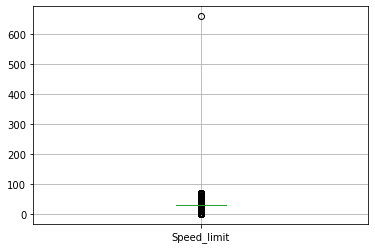

In [13]:
df_t.boxplot(['Speed_limit'])

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

I want to take glance look at speed destribution and rid off outliers.

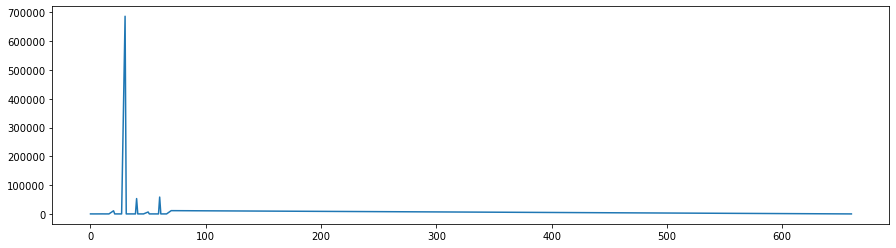

In [15]:
plt.figure(figsize=(15,4))
plt.plot(df_t["Speed_limit"].value_counts().sort_index())

I want to assign NaN to outliers and drop-off these nans

In [16]:
df_t.loc[df_t['Speed_limit'] > 100] = np.nan

In [17]:
df_t.isnull().sum()

Accident_Index          1
Number_of_Vehicles      1
Number_of_Casualties    1
Date                    1
Time                    1
Speed_limit             1
Road_conditions         1
Weather_conditions      1
Day                     1
Road_type               1
Light_conditions        1
Gender                  1
Severity                1
Age_Grp                 1
dtype: int64

In [18]:
df_t = df_t.dropna(axis = 0)

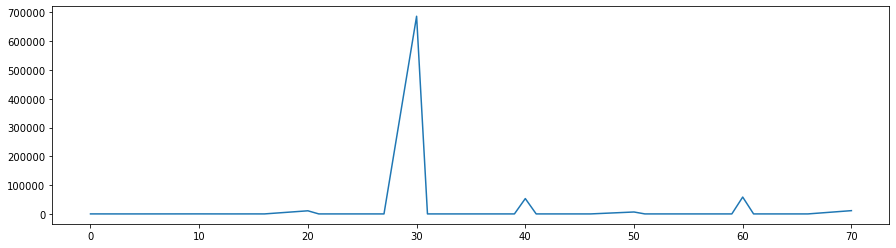

In [19]:
plt.figure(figsize=(15,4))
plt.plot(df_t["Speed_limit"].value_counts().sort_index())

<AxesSubplot:>

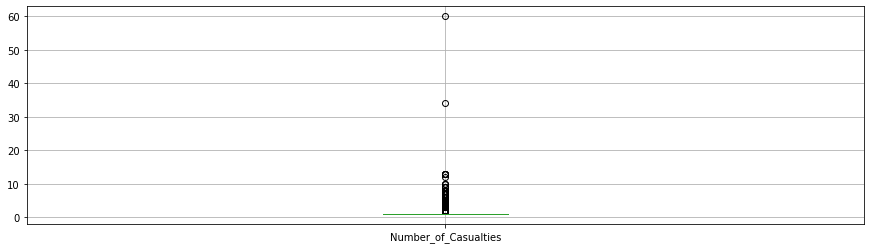

In [20]:
plt.figure(figsize=(15,4))
df_t.boxplot(['Number_of_Casualties'])


In [21]:
n_cas = df_t.loc[df_t['Number_of_Casualties'] > 20]

In [22]:
n_cas

,Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions,Gender,Severity,Age_Grp
44320,198061C412800,3.0,60.0,1980-01-12,08:55,30.0,Dry,Clear,Monday,Single carriageway,Daylight,Male,Slight,11 to 15
772744,2015471503836,3.0,34.0,2015-06-07,09:22,30.0,Dry,Clear,Monday,Single carriageway,Daylight,Male,Slight,36 to 45


Number_of_Vehicles is a reference to how many vehicles were involved in the accident, 
Number_of_Casualties is a reference to the number of casualties in that accident. Here we have 60 and 34 casualties. 
I assume that this is typo, or at least unusual case, so I get rid of it.

In [23]:
n_cas = np.nan

In [24]:
df_t = df_t.dropna(axis = 0)

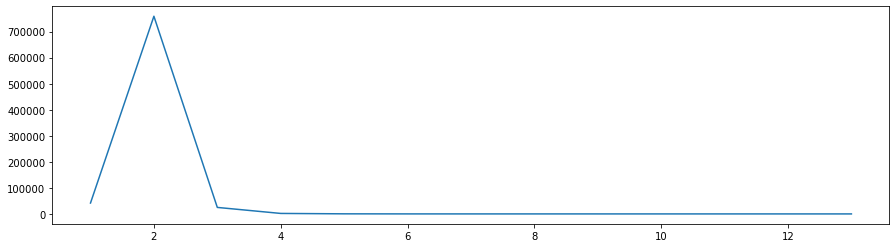

In [25]:
plt.figure(figsize=(15,4))
plt.plot(df_t["Number_of_Vehicles"].value_counts().sort_index())

In [26]:
df_t["Number_of_Vehicles"].describe()

count    827860.000000
mean          1.986178
std           0.311600
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          13.000000
Name: Number_of_Vehicles, dtype: float64

Number_of_Vehicles is a reference to how many vehicles were involved in the accident, here we can see max 13 vehicles. It is possible on a busy road during rush hour, I leave it as it is.

In [27]:
num_vh = df_t.loc[df_t['Number_of_Vehicles'] > 9]

In [28]:
num_vh

,Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions,Gender,Severity,Age_Grp
137255,198416N080528,12.0,8.0,1984-01-07,14:40,60.0,Dry,Clear,Sunday,Single carriageway,Daylight,Male,Fatal,16 to 20
268413,1989219402351,10.0,10.0,1989-07-05,10:00,60.0,Dry,Clear,Sunday,Single carriageway,Daylight,Male,Slight,16 to 20
272105,1989352231789,10.0,4.0,1989-10-14,17:50,60.0,Dry,Clear,Saturday,Single carriageway,Daylight,Male,Slight,56 to 65
624794,2006600CO9003,13.0,13.0,2006-08-01,10:10,60.0,Frost,Clear,Sunday,Single carriageway,Daylight,Male,Fatal,11 to 15
792681,201663BC16016,10.0,10.0,2016-08-14,12:20,60.0,Dry,Clear,Sunday,Single carriageway,Daylight,Male,Serious,16 to 20


I want to validate info about speed, I know not much about it and can't say if this numbers looks good or not.


National speed limits in UK
https://www.carwow.co.uk/blog/national-speed-limit-uk#gref

A speed limit of 30 miles per hour (48km/h) applies to all single and dual carriageways with street lights, unless there are signs showing otherwise.

Built-up areas mph (km/h) 30 (48)	
Single carriageways mph (km/h) 60 (96)
Dual carriageways mph (km/h)70 (112)	
Motorways mph (km/h) 70 (112)
			

I want to convert mph to kmh

In [29]:
df_t['kmh'] = np.round((df_t['Speed_limit'] * 1.60934),2)

In [30]:
df_t.head()

,Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions,Gender,Severity,Age_Grp,kmh
0,197901A1SEE71,2.0,1.0,1979-01-01,18:20,50.0,Snow,Unknown,Monday,Dual carriageway,Darkness lights lit,Male,Serious,36 to 45,80.47
1,197901A2JDW40,1.0,1.0,1979-02-01,09:15,30.0,Snow,Unknown,Tuesday,Unknown,Daylight,Male,Slight,46 to 55,48.28
2,197901A4IJV90,2.0,1.0,1979-04-01,08:45,30.0,Snow,Unknown,Thursday,Unknown,Daylight,Male,Slight,46 to 55,48.28
3,197901A4NIE33,2.0,1.0,1979-04-01,13:40,30.0,Wet,Unknown,Thursday,Unknown,Daylight,Male,Slight,36 to 45,48.28
4,197901A4SKO47,2.0,1.0,1979-04-01,18:50,30.0,Wet,Unknown,Thursday,Unknown,Darkness lights lit,Male,Slight,46 to 55,48.28


For more granular data, 
I processed the data from the Date to get 
the names of the months, 
the names of the days, 
the names of the seasons, 
whether there was precipitation on this day or not, 
and whether it was a working day, weekend or Friday (I called it pre-weekend, because Friday has its own specifics in people's lives)

In [31]:
df_t['Month'] = pd.to_datetime(df_t['Date']).dt.month

In [32]:
df_t.head()

,Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions,Gender,Severity,Age_Grp,kmh,Month
0,197901A1SEE71,2.0,1.0,1979-01-01,18:20,50.0,Snow,Unknown,Monday,Dual carriageway,Darkness lights lit,Male,Serious,36 to 45,80.47,1
1,197901A2JDW40,1.0,1.0,1979-02-01,09:15,30.0,Snow,Unknown,Tuesday,Unknown,Daylight,Male,Slight,46 to 55,48.28,2
2,197901A4IJV90,2.0,1.0,1979-04-01,08:45,30.0,Snow,Unknown,Thursday,Unknown,Daylight,Male,Slight,46 to 55,48.28,4
3,197901A4NIE33,2.0,1.0,1979-04-01,13:40,30.0,Wet,Unknown,Thursday,Unknown,Daylight,Male,Slight,36 to 45,48.28,4
4,197901A4SKO47,2.0,1.0,1979-04-01,18:50,30.0,Wet,Unknown,Thursday,Unknown,Darkness lights lit,Male,Slight,46 to 55,48.28,4


In [33]:
season = {
            12:'Winter', 1:'Winter', 2:'Winter',
            3:'Spring', 4:'Spring', 5:'Spring',
            6:'Summer', 7:'Summer', 8:'Summer',
            9:'Autumn', 10:'Autumn', 11:'Autumn'}

In [34]:
df_t['Season'] = df_t['Month'].apply(lambda x: season[x])

In [35]:
df_t.head()

,Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions,Gender,Severity,Age_Grp,kmh,Month,Season
0,197901A1SEE71,2.0,1.0,1979-01-01,18:20,50.0,Snow,Unknown,Monday,Dual carriageway,Darkness lights lit,Male,Serious,36 to 45,80.47,1,Winter
1,197901A2JDW40,1.0,1.0,1979-02-01,09:15,30.0,Snow,Unknown,Tuesday,Unknown,Daylight,Male,Slight,46 to 55,48.28,2,Winter
2,197901A4IJV90,2.0,1.0,1979-04-01,08:45,30.0,Snow,Unknown,Thursday,Unknown,Daylight,Male,Slight,46 to 55,48.28,4,Spring
3,197901A4NIE33,2.0,1.0,1979-04-01,13:40,30.0,Wet,Unknown,Thursday,Unknown,Daylight,Male,Slight,36 to 45,48.28,4,Spring
4,197901A4SKO47,2.0,1.0,1979-04-01,18:50,30.0,Wet,Unknown,Thursday,Unknown,Darkness lights lit,Male,Slight,46 to 55,48.28,4,Spring


In [37]:
df_t.to_csv('/Users/kristina/Documents/Velo_python/velo_steps1.csv', index=False)

In [38]:
df = pd.read_csv('/Users/kristina/Documents/Velo_python/velo_steps1.csv')

In [40]:
df.head()

,Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions,Gender,Severity,Age_Grp,kmh,Month,Season
0,197901A1SEE71,2.0,1.0,1979-01-01,18:20,50.0,Snow,Unknown,Monday,Dual carriageway,Darkness lights lit,Male,Serious,36 to 45,80.47,1,Winter
1,197901A2JDW40,1.0,1.0,1979-02-01,09:15,30.0,Snow,Unknown,Tuesday,Unknown,Daylight,Male,Slight,46 to 55,48.28,2,Winter
2,197901A4IJV90,2.0,1.0,1979-04-01,08:45,30.0,Snow,Unknown,Thursday,Unknown,Daylight,Male,Slight,46 to 55,48.28,4,Spring
3,197901A4NIE33,2.0,1.0,1979-04-01,13:40,30.0,Wet,Unknown,Thursday,Unknown,Daylight,Male,Slight,36 to 45,48.28,4,Spring
4,197901A4SKO47,2.0,1.0,1979-04-01,18:50,30.0,Wet,Unknown,Thursday,Unknown,Darkness lights lit,Male,Slight,46 to 55,48.28,4,Spring


I see that there are a lot of Unknown and Missing Data values. I want to check this out

In [41]:
roads = df.Road_type.value_counts(normalize=True, ascending=False).mul(100).round(1).astype(str) + '%'

In [42]:
roads

Single carriageway    79.3%
Roundabout             9.1%
Dual carriageway       7.1%
Unknown                3.7%
One way sreet          0.7%
Slip road              0.1%
Name: Road_type, dtype: object

In [43]:
weather = df.Weather_conditions.value_counts(normalize=True, ascending=False).mul(100).round(1).astype(str) + '%'

In [44]:
weather

Clear              82.5%
Rain                9.9%
Unknown             2.9%
Clear and windy     1.4%
Other               1.4%
Rain and windy      1.1%
Fog                 0.4%
Snow                0.3%
Snow and windy      0.1%
Missing data        0.0%
Name: Weather_conditions, dtype: object

In [45]:
roads = df.Road_type.value_counts(normalize=True, ascending=False).mul(100).round(1).astype(str) + '%'

In [46]:
roads

Single carriageway    79.3%
Roundabout             9.1%
Dual carriageway       7.1%
Unknown                3.7%
One way sreet          0.7%
Slip road              0.1%
Name: Road_type, dtype: object

In [47]:
df['Light_conditions'].unique()

array(['Darkness lights lit', 'Daylight', 'Darkness no lights'],
      dtype=object)

In [48]:
df['Severity'].unique()

array(['Serious', 'Slight', 'Fatal'], dtype=object)

In [49]:
df['Gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

Ok, now I see that kind of 'missing data' filled in columns Weather_condition, Road_type and Road_conditions. I want to drop this rows.

In [50]:
df.loc[df['Weather_conditions'] == 'Unknown'] = np.nan

In [51]:
df.loc[df['Weather_conditions'] == 'Missing data'] = np.nan

In [52]:
df.loc[df['Weather_conditions'] == 'Other'] = np.nan

In [53]:
t = df.Weather_conditions.value_counts(normalize=True, ascending=False).mul(100).round(1).astype(str) + '%'

In [54]:
t

Clear              86.3%
Rain               10.4%
Clear and windy     1.5%
Rain and windy      1.1%
Fog                 0.4%
Snow                0.3%
Snow and windy      0.1%
Name: Weather_conditions, dtype: object

In [55]:
df.loc[df['Road_conditions'] == 'Missing data'] = np.nan

In [56]:
df.loc[df['Road_type'] == 'Unknown'] = np.nan

In [57]:
df = df.dropna(axis = 0)

In [58]:
df.count()

Accident_Index          769412
Number_of_Vehicles      769412
Number_of_Casualties    769412
Date                    769412
Time                    769412
Speed_limit             769412
Road_conditions         769412
Weather_conditions      769412
Day                     769412
Road_type               769412
Light_conditions        769412
Gender                  769412
Severity                769412
Age_Grp                 769412
kmh                     769412
Month                   769412
Season                  769412
dtype: int64

In [63]:
df.head()

,Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions,Gender,Severity,Age_Grp,kmh,Month,Season,Precipation_0_1
22,197901AAGJE41,2.0,1.0,1979-10-01,06:45,30.0,Wet,Rain,Wednesday,Single carriageway,Darkness lights lit,Female,Slight,26 to 35,48.28,10.0,Autumn,1
23,197901AAHCI12,2.0,1.0,1979-10-01,07:10,30.0,Wet,Rain,Wednesday,Single carriageway,Darkness lights lit,Male,Serious,56 to 65,48.28,10.0,Autumn,1
24,197901AAHCL87,2.0,1.0,1979-10-01,07:10,30.0,Snow,Rain,Wednesday,Roundabout,Darkness lights lit,Male,Slight,36 to 45,48.28,10.0,Autumn,1
31,197901AAPDF89,2.0,1.0,1979-10-01,15:15,30.0,Wet,Rain,Wednesday,Roundabout,Daylight,Male,Slight,26 to 35,48.28,10.0,Autumn,1
33,197901AAQGD85,2.0,1.0,1979-10-01,16:30,30.0,Wet,Rain,Wednesday,Single carriageway,Darkness lights lit,Male,Slight,11 to 15,48.28,10.0,Autumn,1


In [62]:
df.to_csv('/Users/kristina/Documents/Velo_python/velo_steps2.csv', index=False)

In [64]:
df = pd.read_csv('/Users/kristina/Documents/Velo_python/velo_steps2.csv')

In [66]:
df.head()

,Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions,Gender,Severity,Age_Grp,kmh,Month,Season,Precipation_0_1
0,197901AAGJE41,2.0,1.0,1979-10-01,06:45,30.0,Wet,Rain,Wednesday,Single carriageway,Darkness lights lit,Female,Slight,26 to 35,48.28,10.0,Autumn,1
1,197901AAHCI12,2.0,1.0,1979-10-01,07:10,30.0,Wet,Rain,Wednesday,Single carriageway,Darkness lights lit,Male,Serious,56 to 65,48.28,10.0,Autumn,1
2,197901AAHCL87,2.0,1.0,1979-10-01,07:10,30.0,Snow,Rain,Wednesday,Roundabout,Darkness lights lit,Male,Slight,36 to 45,48.28,10.0,Autumn,1
3,197901AAPDF89,2.0,1.0,1979-10-01,15:15,30.0,Wet,Rain,Wednesday,Roundabout,Daylight,Male,Slight,26 to 35,48.28,10.0,Autumn,1
4,197901AAQGD85,2.0,1.0,1979-10-01,16:30,30.0,Wet,Rain,Wednesday,Single carriageway,Darkness lights lit,Male,Slight,11 to 15,48.28,10.0,Autumn,1


In [67]:
df.drop(columns =['Speed_limit', 'Accident_Index'], axis = 1, inplace=True)

In [68]:
df['Month'] = pd.to_datetime(df['Date']).dt.month_name()

In [69]:
df.head()

,Number_of_Vehicles,Number_of_Casualties,Date,Time,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions,Gender,Severity,Age_Grp,kmh,Month,Season,Precipation_0_1
0,2.0,1.0,1979-10-01,06:45,Wet,Rain,Wednesday,Single carriageway,Darkness lights lit,Female,Slight,26 to 35,48.28,October,Autumn,1
1,2.0,1.0,1979-10-01,07:10,Wet,Rain,Wednesday,Single carriageway,Darkness lights lit,Male,Serious,56 to 65,48.28,October,Autumn,1
2,2.0,1.0,1979-10-01,07:10,Snow,Rain,Wednesday,Roundabout,Darkness lights lit,Male,Slight,36 to 45,48.28,October,Autumn,1
3,2.0,1.0,1979-10-01,15:15,Wet,Rain,Wednesday,Roundabout,Daylight,Male,Slight,26 to 35,48.28,October,Autumn,1
4,2.0,1.0,1979-10-01,16:30,Wet,Rain,Wednesday,Single carriageway,Darkness lights lit,Male,Slight,11 to 15,48.28,October,Autumn,1


In [70]:
workingdays = {
           'Monday':'working_day', 
           'Tuesday':'working_day', 
           'Wednesday':'working_day',
            'Thursday':'working_day', 
            'Friday':'pre_weekend', 
            'Saturday':'weekend',
            'Sunday':'weekend'}

In [71]:
df['Working_days'] = df['Day'].apply(lambda x: workingdays[x])

In [72]:
df.head()

,Number_of_Vehicles,Number_of_Casualties,Date,Time,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions,Gender,Severity,Age_Grp,kmh,Month,Season,Precipation_0_1,Working_days
0,2.0,1.0,1979-10-01,06:45,Wet,Rain,Wednesday,Single carriageway,Darkness lights lit,Female,Slight,26 to 35,48.28,October,Autumn,1,working_day
1,2.0,1.0,1979-10-01,07:10,Wet,Rain,Wednesday,Single carriageway,Darkness lights lit,Male,Serious,56 to 65,48.28,October,Autumn,1,working_day
2,2.0,1.0,1979-10-01,07:10,Snow,Rain,Wednesday,Roundabout,Darkness lights lit,Male,Slight,36 to 45,48.28,October,Autumn,1,working_day
3,2.0,1.0,1979-10-01,15:15,Wet,Rain,Wednesday,Roundabout,Daylight,Male,Slight,26 to 35,48.28,October,Autumn,1,working_day
4,2.0,1.0,1979-10-01,16:30,Wet,Rain,Wednesday,Single carriageway,Darkness lights lit,Male,Slight,11 to 15,48.28,October,Autumn,1,working_day


In [73]:
df.rename(columns={'kmh':'Speed_limit_kmh'})

,Number_of_Vehicles,Number_of_Casualties,Date,Time,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions,Gender,Severity,Age_Grp,Speed_limit_kmh,Month,Season,Precipation_0_1,Working_days
0,2.0,1.0,1979-10-01,06:45,Wet,Rain,Wednesday,Single carriageway,Darkness lights lit,Female,Slight,26 to 35,48.28,October,Autumn,1,working_day
1,2.0,1.0,1979-10-01,07:10,Wet,Rain,Wednesday,Single carriageway,Darkness lights lit,Male,Serious,56 to 65,48.28,October,Autumn,1,working_day
2,2.0,1.0,1979-10-01,07:10,Snow,Rain,Wednesday,Roundabout,Darkness lights lit,Male,Slight,36 to 45,48.28,October,Autumn,1,working_day
3,2.0,1.0,1979-10-01,15:15,Wet,Rain,Wednesday,Roundabout,Daylight,Male,Slight,26 to 35,48.28,October,Autumn,1,working_day
4,2.0,1.0,1979-10-01,16:30,Wet,Rain,Wednesday,Single carriageway,Darkness lights lit,Male,Slight,11 to 15,48.28,October,Autumn,1,working_day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769407,2.0,1.0,2018-02-07,14:55,Dry,Clear,Monday,Single carriageway,Daylight,Male,Slight,6 to 10,48.28,February,Winter,0,working_day
769408,2.0,1.0,2018-07-24,07:45,Dry,Clear,Tuesday,Single carriageway,Daylight,Male,Serious,56 to 65,48.28,July,Summer,0,working_day
769409,2.0,1.0,2018-10-08,13:25,Dry,Clear,Friday,Single carriageway,Daylight,Male,Serious,11 to 15,32.19,October,Autumn,0,pre_weekend
769410,2.0,1.0,2018-07-18,21:10,Dry,Clear,Wednesday,Single carriageway,Daylight,Male,Serious,46 to 55,48.28,July,Summer,0,working_day


In [77]:
df.to_csv('/Users/kristina/Documents/Velo_python/velo_steps3_clean.csv', index=False)

In [78]:
df

,Number_of_Vehicles,Number_of_Casualties,Date,Time,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions,Gender,Severity,Age_Grp,kmh,Month,Season,Precipation_0_1,Working_days
0,2.0,1.0,1979-10-01,06:45,Wet,Rain,Wednesday,Single carriageway,Darkness lights lit,Female,Slight,26 to 35,48.28,October,Autumn,1,working_day
1,2.0,1.0,1979-10-01,07:10,Wet,Rain,Wednesday,Single carriageway,Darkness lights lit,Male,Serious,56 to 65,48.28,October,Autumn,1,working_day
2,2.0,1.0,1979-10-01,07:10,Snow,Rain,Wednesday,Roundabout,Darkness lights lit,Male,Slight,36 to 45,48.28,October,Autumn,1,working_day
3,2.0,1.0,1979-10-01,15:15,Wet,Rain,Wednesday,Roundabout,Daylight,Male,Slight,26 to 35,48.28,October,Autumn,1,working_day
4,2.0,1.0,1979-10-01,16:30,Wet,Rain,Wednesday,Single carriageway,Darkness lights lit,Male,Slight,11 to 15,48.28,October,Autumn,1,working_day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769407,2.0,1.0,2018-02-07,14:55,Dry,Clear,Monday,Single carriageway,Daylight,Male,Slight,6 to 10,48.28,February,Winter,0,working_day
769408,2.0,1.0,2018-07-24,07:45,Dry,Clear,Tuesday,Single carriageway,Daylight,Male,Serious,56 to 65,48.28,July,Summer,0,working_day
769409,2.0,1.0,2018-10-08,13:25,Dry,Clear,Friday,Single carriageway,Daylight,Male,Serious,11 to 15,32.19,October,Autumn,0,pre_weekend
769410,2.0,1.0,2018-07-18,21:10,Dry,Clear,Wednesday,Single carriageway,Daylight,Male,Serious,46 to 55,48.28,July,Summer,0,working_day
